## Biblioteca

Importar las bibliotecas necesarias para la lectura del archivo .rio

In [ ]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

## Funciones necesarias para el procesamiento

Se definen cuatro funciones, la primera denominada ***eliminar_espacios(x)*** permite eliminar los espacios al inicio y al final de cada string, la segunda ***line_search(x)*** permite buscar las cuatro primeras letras de cada linea del archivo .txt, esto con el fin de encontrar la palabra LINE o LABEL, la tercera función permite dividir cada palabra del renglon y convertirlo en una lista, por ultimo la ultima función ***index_list()*** cumple con el objetivo de buscar palabras en especifico en un texto

In [ ]:
def eliminar_espacios(x):
      bla = x.strip()
      return bla

In [ ]:
def line_search(x,n):
    m = x[0:n]
    return m

In [ ]:
def delimitar_espacios(x):
      bla = x.split()
      return bla

In [ ]:
def index_list(lista, elemento):

    posiciones = []  # nuestra lista para guardar las posiciones
    posicion = -1  # empezaremos a buscar en posicion + 1 (que es 0 inicialmente)

    try:
        while True:
            # buscamos empezando a buscar desde la última posición encontrada
            posicion = lista.index(elemento, posicion + 1)
            posiciones.append(posicion)
    except:
        pass  # no hacemos nada si index lanza ValueError

    return posiciones

### Función para la carga

La función numerico, recibe un dataFrame que por medio de un ciclo for recorre las filas de dicho DataFrame, esta función cumple el objetivo de ubicar las lineas donde hay numeros

In [ ]:
def numerico(df):
    r,c = df.shape
    busqueda_esp = np.vectorize(line_search)
    for i in range(c):
      df.iloc[:,i] = busqueda_esp(df.iloc[:,i],4)
      df.iloc[:,i]= pd.to_numeric(df.iloc[:,i],errors = 'coerce')
    return df

La función encoding, permite la lectura del archivo .txt, dependiendo de la marca que especifique

In [ ]:
def encoding(marca):

      if marca == 'siemens':
                            encoding = "ISO-8859-1"
      elif marca == 'abb':
                          encoding = None
      elif marca == 'ametek':
                          encoding = None
      elif marca == 'GE Reason':
                          encoding = None
      else:
        print('Syntax error in marca= ')

      return encoding

recibe el DataFrame, que contiene las zonas especificas del relé (valores numericos entre las palabras claves 'BEGIN ZONE' y 'END ZONE'), con el fin de quitar las celdas donde no hay valores numericos y crear un diccionario, que tenga como palabra clave, el nombre de la zona y como significado los numeros correspondientes en cada zona, para asi facilitar la función grafica

In [ ]:
def zonas_key(zonas):
    for key in zonas:
      z = pd.DataFrame(zonas[key]).dropna()
      z = numerico(z)
      zonas[key] = z
      zonas[key] = zonas[key].dropna(axis = 1)

    return zonas

La grafica tiene dos posibilidades, la primera es que el punto de inicio se repita y la srgunda es que la trayectoria no finalice en el punto de inicio, con este fin se realiza una función if-else, que nos permite determinar si el .rio analizado tiene o no, la trayectoria completa, en caso de que no sea el caso, se completa con los vectores a y b

In [ ]:
def grafica_zonas(zonas):

    for key in zonas:
        ## Finaliza en el mismo punto donde inicia
        a = (np.array(zonas[key][1])).tolist()
        a.append(zonas[key][1].iloc[0])

        ## Finaliza en el mismo punto donde inicia
        b = (np.array(zonas[key][2])).tolist()
        b.append(zonas[key][2].iloc[0])

        #print(a)
        #print(b)

        if (a.count(zonas[key][1].loc[0])) > 2:
            plt.plot(zonas[key][1],zonas[key][2],marker ="o",label = key)

        else:
            plt.plot(a,b,marker ="o",label = key)


    plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))
    plt.show()

función read_rio():

Objetivo: la función juega e papel de __main__ para esta función del programa, lee, lee, el archivo como .txt, dicho metodo tambien necesita de la variable encoding, siguiendo la misma logica de las funciones carga, explicadas en otros documentos colab

Procedimiento: se lee el .txt, se separan los renglones y se cargan a un vector, cada posición del vector obtiene un renglon, despues de esto se convierte licho vector en lista para facilitar su tratamiento



```
start = index_list(rio, 'BEGIN ZONE')
end = index_list(rio, 'END ZONE')

```

start y end, usan la función index_list, para buscar las palabras, 'BEGIN ZONE'  y 'END ZONE', en el vector rio, que recordemos es una lista con los rengloes del archivo .txt, en cada posición de la misma  

finalmente, se hace uso de las funciones zonas(), zonas_key() y grafica_zonas, explicadas en las celdas correspondientes


In [ ]:
def read_rio(link, marca):
  dco = encoding(marca)
  rio_load = open(link ,encoding = dco)
  rio = rio_load.read().splitlines()
  fun_eliminar_espacios = np.vectorize(eliminar_espacios)
  rio = list(fun_eliminar_espacios(rio))

  ## Zonas de protección
  start = index_list(rio, 'BEGIN ZONE')
  end = index_list(rio, 'END ZONE')

  zonas_proteccion = zonas(rio,start,end)
  zonas_proteccion = zonas_key(zonas_proteccion)
  grafica_zonas(zonas_proteccion)


  return rio

Función zonas():
objetivo: obtiene el vector con los renglones del archivo rio, los indices, donde se encuentran la palabra 'BEGIN ZONE' y 'END ZONE', con el fin de tener como resultado solo las variables numericas que se encuentran entre estas dos palabras, que en resumen son los puntos correspondientes a la zonas

Procedimiento: se crea un dicionario vacio, llamado zonas, que finalmente recibe, los puntos de la proteción, se genera un ciclo for, qe recorre el vector rio, buscando las varibles numericas dentro de 'BEGIN ZONE' y 'END ZONE'


In [ ]:
def zonas(rio,start_zone,end_zone):
    zonas = {}
    len(start_zone)
    busqueda_esp = np.vectorize(line_search)
    for k in range(len(start_zone)):
        z_n = rio[start_zone[k]:(end_zone[k]+1)]
        lin = list(busqueda_esp(z_n,4))
        line_z1 = index_list(lin, 'LINE')
        name = list([index_list(lin, ('NAME')), index_list(lin, ('LABE'))])
        name.remove([])
        name = name[0]
        name = int(name[0])
        name_zone = z_n[name]
        line = z_n[line_z1[0]:(line_z1[-1]+1)]
        line_df = [delimitar_espacios(k) for k in line]
        zonas[name_zone] = line_df
    return zonas

## links de prueba

In [ ]:
pp2 = r'/content/drive/MyDrive/Análisis de eventos /2021FEB/20210209 034216 BL1NOR-PUR PP2.rio'
pp1 = r'/content/drive/MyDrive/Análisis de eventos /2021FEB/20210209 034217 BL1NOR-PUR PP1.RIO'

## Prueba final archivo.rio

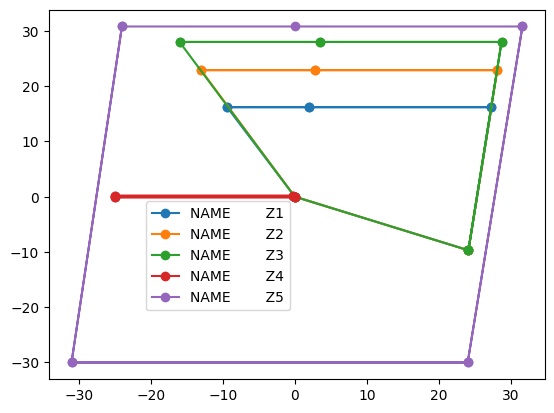

In [ ]:
rio = read_rio(pp2, 'siemens')